In [1]:
#Calcular a Similaridade utilizando tanimoto
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import kora.install.rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [2]:
dataplasmo = pd.read_csv(r'D:\Projetos academicos\Labmol\Code\chemspace\clinical_results\cli_temp\Sparse_Clinical_Hepato_mMol.csv', sep=',')

In [3]:
# We will calculate the descriptors and add them to our table
for i in dataplasmo.index:
  mol=Chem.MolFromSmiles(dataplasmo.loc[i,'SMILES'])
  dataplasmo.loc[i,'MolWt'] = Descriptors.ExactMolWt (mol)
  dataplasmo.loc[i,'TPSA'] = Chem.rdMolDescriptors.CalcTPSA(mol) #Topological Polar Surface Area
  dataplasmo.loc[i,'nRotB'] = Descriptors.NumRotatableBonds (mol) #Number of rotable bonds
  dataplasmo.loc[i,'HBD'] = Descriptors.NumHDonors(mol) #Number of H bond donors
  dataplasmo.loc[i,'HBA'] = Descriptors.NumHAcceptors(mol) #Number of H bond acceptors
  dataplasmo.loc[i,'LogP'] = Descriptors.MolLogP(mol) #LogP


In [4]:
dataplasmo

,ID,SMILES,Clinical_Filtered Abnormal Hepatic Fun _IC50,Clinical_Filtered Cholecystiti_IC50,Clinical_Filtered Cholelitiasi_IC50,Clinical_Filtered Cholestasi_IC50,Clinical_Filtered cholestatic Jaundice_IC50,Clinical_Filtered Hepatic Failure_IC50,Clinical_Filtered Hepatic necrosi_IC50,Clinical_Filtered Hepatic Steatosi_IC50,...,Clinical_Filtered Hepatotoxicity_IC50,Clinical_Filtered Hyperbilirubinemia_IC50,Clinical_Filtered Jaundice_IC50,Clinical_Filtered Liver Injury_IC50,MolWt,TPSA,nRotB,HBD,HBA,LogP
0,0,CCN1CCN(Cc2ccc(Nc3ncc(F)c(-c4cc(F)c5nc(C)n(C(C...,3.098676,3.098676,NaN,NaN,NaN,3.251697,NaN,3.098676,...,3.098676,NaN,NaN,3.098676,506.271799,75.00,7.0,1.0,8.0,4.93692
1,1,CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(C(C)=O)c1,-0.198421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,336.204907,87.66,10.0,3.0,5.0,2.36550
2,2,C/C([O-])=N/c1nnc(S(N)(=O)=O)s1,4.589035,NaN,NaN,NaN,-0.311166,-0.114166,-0.311166,NaN,...,NaN,NaN,NaN,NaN,220.980856,121.36,2.0,1.0,7.0,-1.40430
3,3,CC(C)(C)C(=O)OCOP(=O)(COCCn1cnc2c(N)ncnc21)OCO...,2.611212,NaN,NaN,NaN,NaN,2.611212,2.469738,2.469738,...,NaN,2.652715,2.442580,NaN,501.198850,166.98,11.0,1.0,13.0,2.70250
4,4,COc1ccc2cccc(CCNC(C)=O)c2c1,2.445331,NaN,NaN,NaN,NaN,2.269967,NaN,NaN,...,2.434901,NaN,2.271438,NaN,243.125929,38.33,4.0,1.0,2.0,2.52700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,594,Nc1nc2nc[nH]c2c(=S)[nH]1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.318538,NaN,167.026566,83.38,0.0,3.0,4.0,0.59769
595,595,CC(S)C(=O)NCC(=O)O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.150445,NaN,163.030314,66.40,3.0,3.0,3.0,-0.49450
596,596,C[C@H](CCC(=O)O)[C@H]1CC[C@H]2[C@@H]3[C@@H](O)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.463850,NaN,392.292660,77.76,4.0,3.0,3.0,4.47790
597,597,COC(=O)/C=C/C(=O)OCCN1C(=O)CCC1=O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.012982,255.074287,89.98,5.0,0.0,6.0,-0.59220


In [5]:
#Seleciona os valores dos descritores separa para um array
descriptors = dataplasmo.loc[:, ['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP']].values

**Padronização das escalas dos descritores:** As diferenças de escala na PCA modificam a distribuição de variância durante a PCA.

In [6]:
#padronização das escalas dos descritores
descriptors_std = StandardScaler().fit_transform(descriptors)

#Calcular PCA
pca = PCA()
descriptors_2d = pca.fit_transform(descriptors_std)

#Passar os componetes para um tabela com seus index
descriptors_pca= pd.DataFrame(descriptors_2d)
descriptors_pca.index = dataplasmo.index
descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]
descriptors_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.279008,0.867553,0.091122,0.021421,-0.030957,0.082095
1,-0.061090,-0.017801,-0.232365,-0.253052,-0.139652,0.051926
2,-0.044286,-1.176082,0.523519,-0.106294,0.012881,-0.113914
3,0.476443,0.430772,0.533719,-0.235273,-0.141674,-0.117604
4,-0.727612,-0.158597,-0.159851,-0.123086,0.013102,0.025359
5,0.207761,-1.206691,0.076419,0.283395,-0.210892,-0.137242
6,-0.452012,-0.797717,-0.086105,0.109337,-0.169488,-0.073440
7,-0.525193,1.503820,-0.335203,-0.180734,0.288924,0.131074
8,2.035872,-0.124404,0.142088,1.322887,-0.249880,0.048580
9,-0.732941,-0.359757,0.044504,0.114915,0.044085,0.026738


In [7]:
print(pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_))

[0.82227943 0.11716512 0.04402979 0.01329797 0.00214797 0.00107972]
0.9999999999999999


<Figure size 576x432 with 0 Axes>

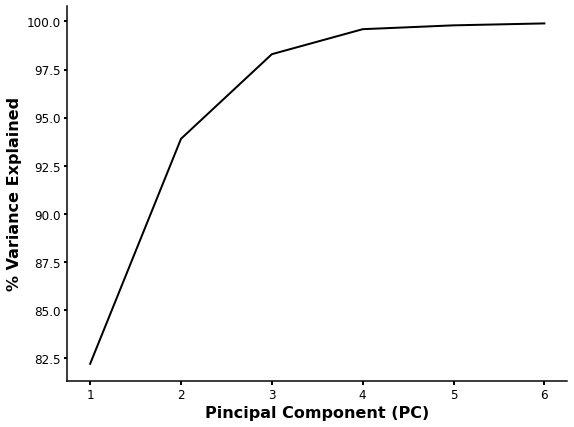

In [8]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(8,6))

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot([i+1 for i in range(len(var))],var,'k-',linewidth=2)
plt.xticks([i+1 for i in range(len(var))])
plt.ylabel('% Variance Explained',fontsize=16,fontweight='bold')
plt.xlabel('Pincipal Component (PC)',fontsize=16,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.tick_params ('both',width=2,labelsize=12)

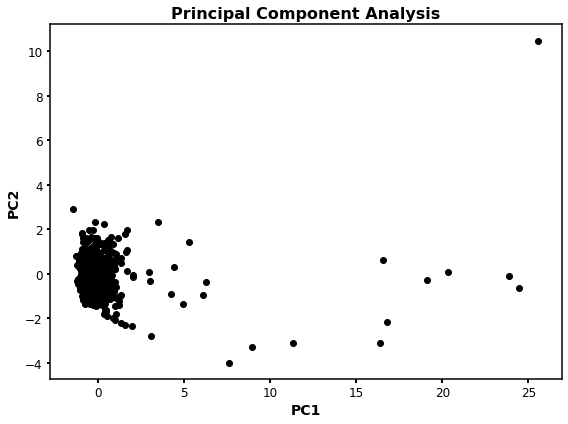

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1'],descriptors_pca['PC2'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

In [10]:
import plotly.express as px
from sklearn.decomposition import PCA

df = dataplasmo
X = dataplasmo[['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['ID'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [11]:
pca.explained_variance_ratio_

array([9.90335598e-01, 9.52298741e-03, 8.53443191e-05])

In [12]:
# This normalization will be performed just for PC1 and PC2, but can be done for all the components.
scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

# And we add the new values to our PCA table
descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

For n_clusters = 2 The average silhouette_score is : 0.905940321646061
For n_clusters = 3 The average silhouette_score is : 0.45493131112650637
For n_clusters = 4 The average silhouette_score is : 0.4530527204283471
For n_clusters = 5 The average silhouette_score is : 0.45458537648951053
For n_clusters = 6 The average silhouette_score is : 0.406076636601095
For n_clusters = 7 The average silhouette_score is : 0.3577406818215732
For n_clusters = 8 The average silhouette_score is : 0.36851788014430514
For n_clusters = 9 The average silhouette_score is : 0.34940475077790767
For n_clusters = 10 The average silhouette_score is : 0.35045784673464453


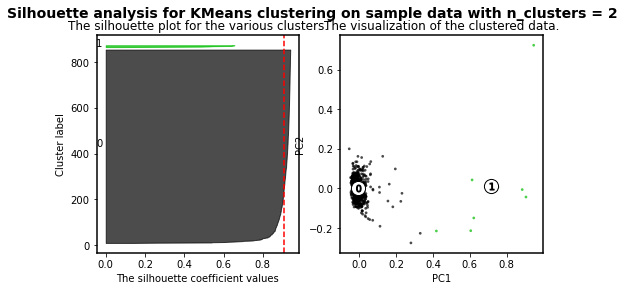

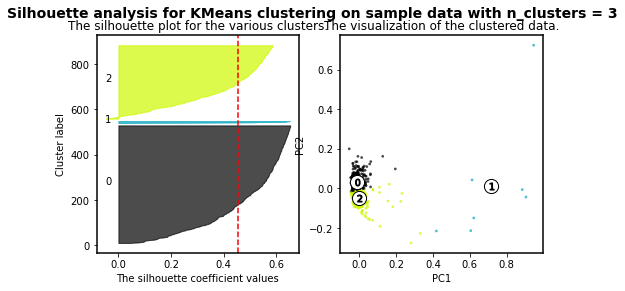

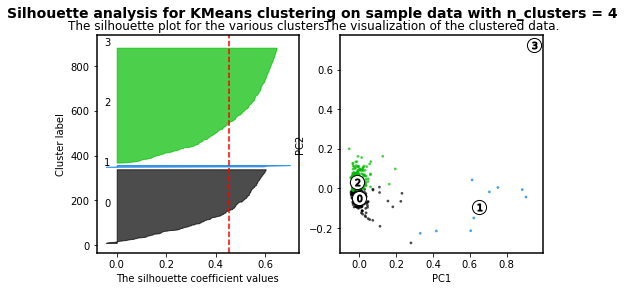

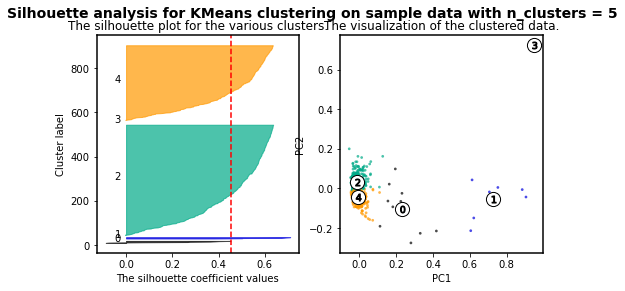

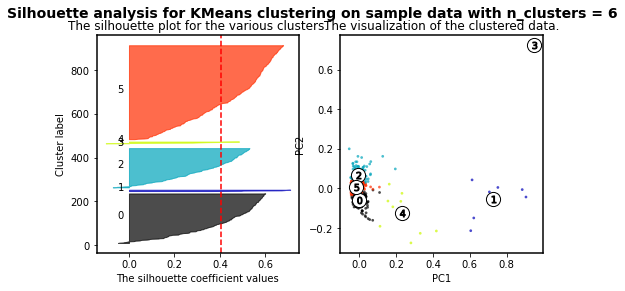

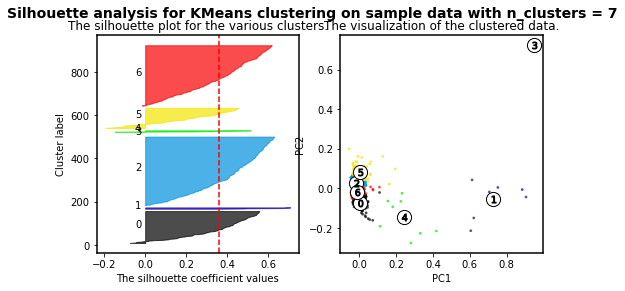

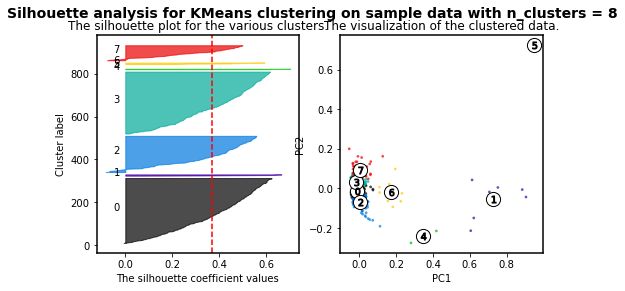

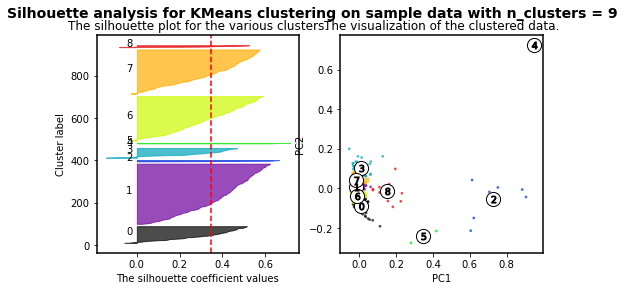

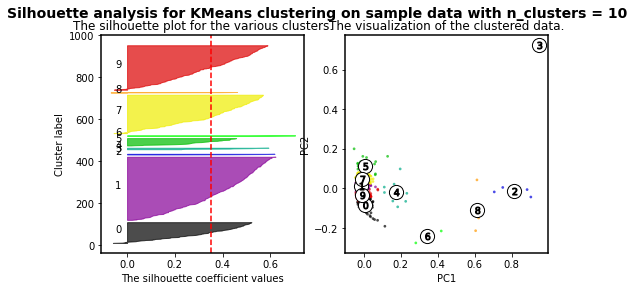

In [13]:
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
    fig, (ax1,ax2)= plt.subplots(1, 2)
    fig.set_size_inches(8, 4)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    silhouette_avg = silhouette_score(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], 
                marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')


    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
  
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, random_state=10) # We define the best number of clusters
clusters = kmeans.fit(descriptors_pca[['PC1_normalized','PC2_normalized']]) #PC1 vs PC2 (normalized values)

In [15]:
descriptors_pca['Cluster_PC1_PC2'] = pd.Series(clusters.labels_, index=dataplasmo.index)

<Figure size 720x576 with 0 Axes>

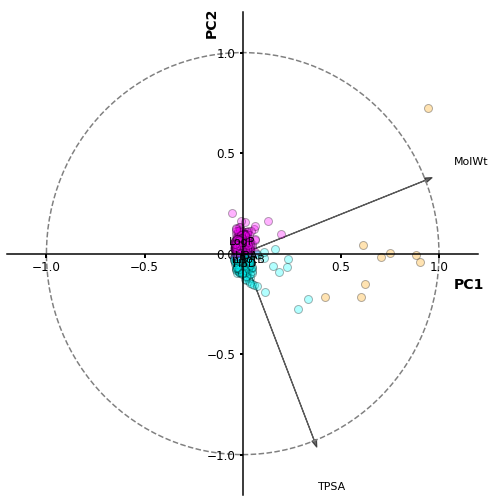

In [16]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(10,8))

fig, ax = plt.subplots(figsize=(7,7))

color_code={ 0:        'magenta',\
             1.0:   'orange',\
             2.0:      'cyan',\
             3.0:           'c',\
             4.0:        'm',\
             5.0:        'y',\
             6.0:        'darkorange',
             7.0:       'k',
             }

for i in descriptors_pca.index: 
        ax.plot(descriptors_pca.loc[i].at['PC1_normalized'],descriptors_pca.loc[i].at['PC2_normalized'],
                    c=color_code[descriptors_pca.loc[i].at['Cluster_PC1_PC2']],
                    marker='o',markersize=8,markeredgecolor='k',alpha=0.3)
        

plt.xlabel ('PC1',fontsize=14,fontweight='bold')
ax.xaxis.set_label_coords(0.98, 0.45)
plt.ylabel ('PC2',fontsize=14,fontweight='bold')
ax.yaxis.set_label_coords(0.45, 0.98)
plt.tick_params ('both',width=2,labelsize=12)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

lab=['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP'] #Feature labels

l=np.transpose(pca.components_[0:2, :]) ## We will get the components eigenvectors (main features) for PC1 and PC2

n = l.shape[0]
for i in range(n):
    plt.arrow(0, 0, l[i,0], l[i,1],color= 'k',alpha=0.6,linewidth=1.2,head_width=0.025)
    plt.text(l[i,0]*1.25, l[i,1]*1.25, lab[i], color = 'k',va = 'center', ha = 'center',fontsize=11)

circle = plt.Circle((0,0), 1, color='gray', fill=False,clip_on=True,linewidth=1.5,linestyle='--')
ax.add_artist(circle)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.tight_layout()
plt.show()